## Description
This project investigate the Boston House Price dataset. The data was drawn from the Boston Standard Metropolitan
Statistical Area (SMSA), each record in the database describes a Boston suburb or town.
The attributes of dataset are defned as follows (taken from the UCI Machine Learning Repository):
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000

11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0:63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s

### 1. Load dataset

In [37]:
import numpy as np
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix

In [5]:
filename = 'housing.csv'
attributes = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=attributes)

In [6]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 2. Explore the data

In [8]:
# Descriptive statistics
print(dataset.shape)
dataset.describe()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [11]:
# Correlation
dataset.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


We can see that many of the attributes have a strong correlation (e.g. > 0.70 or < -0.70). For example:
- NOX and INDUS with 0.77.
- DIS and INDUS with -0.71.
- TAX and INDUS with 0.72.
- AGE and NOX with 0.73.
- DIS and NOX with -0.78.

It also looks like LSTAT has a good negative correlation with the output variable MEDV with a value of -0.74.

### 3. Data Visualization

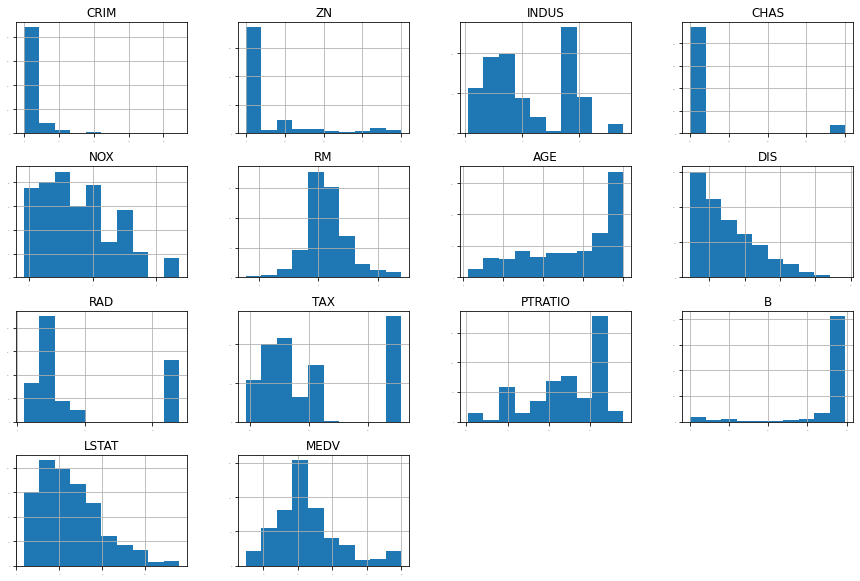

In [32]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15, 10))
pyplot.show()

Some attributes may have an exponential distribution, such as CRIM, ZN, AGE and B. Others may have a bimodal distribution such as RAD and TAX.

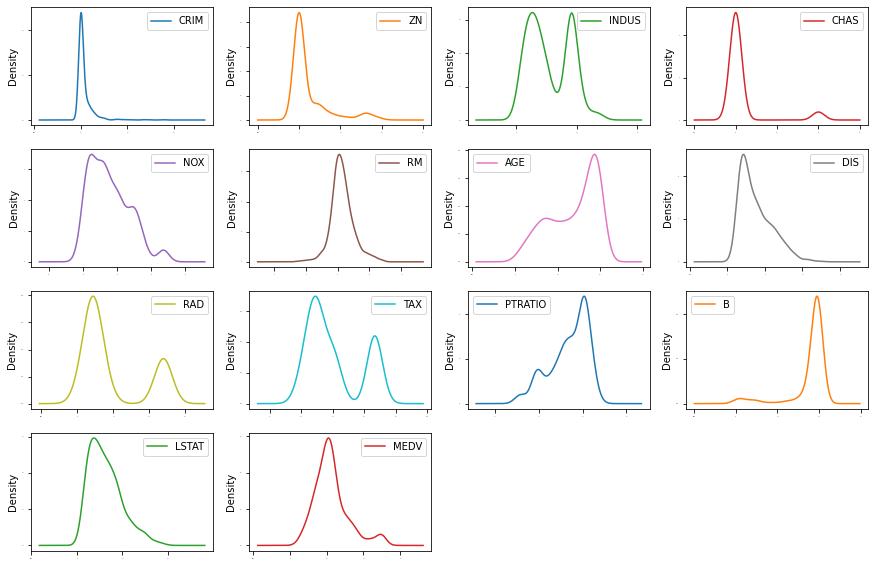

In [33]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15, 10))
pyplot.show()

It looks like NOX, RM and LSTAT may be skewed Gaussian distributions, which might be helpful later with transforms.

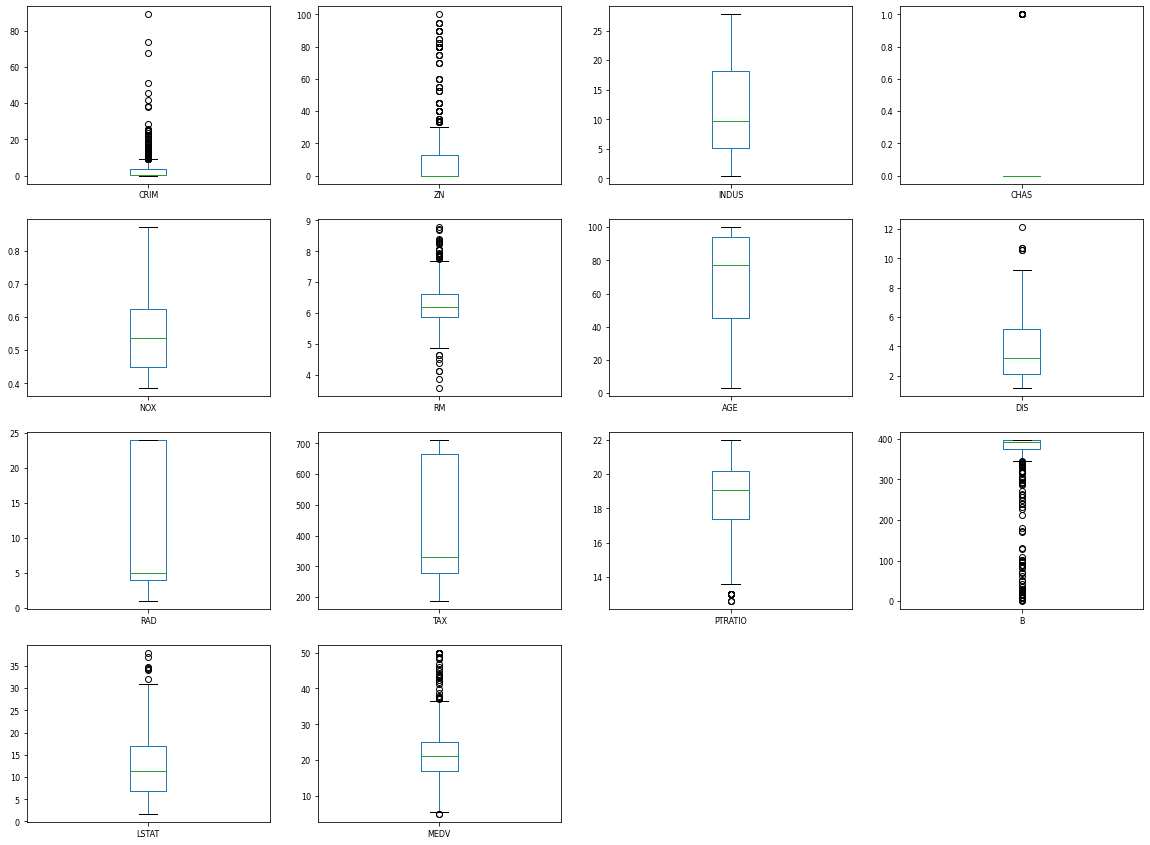

In [35]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8,figsize=(20, 15))
pyplot.show()

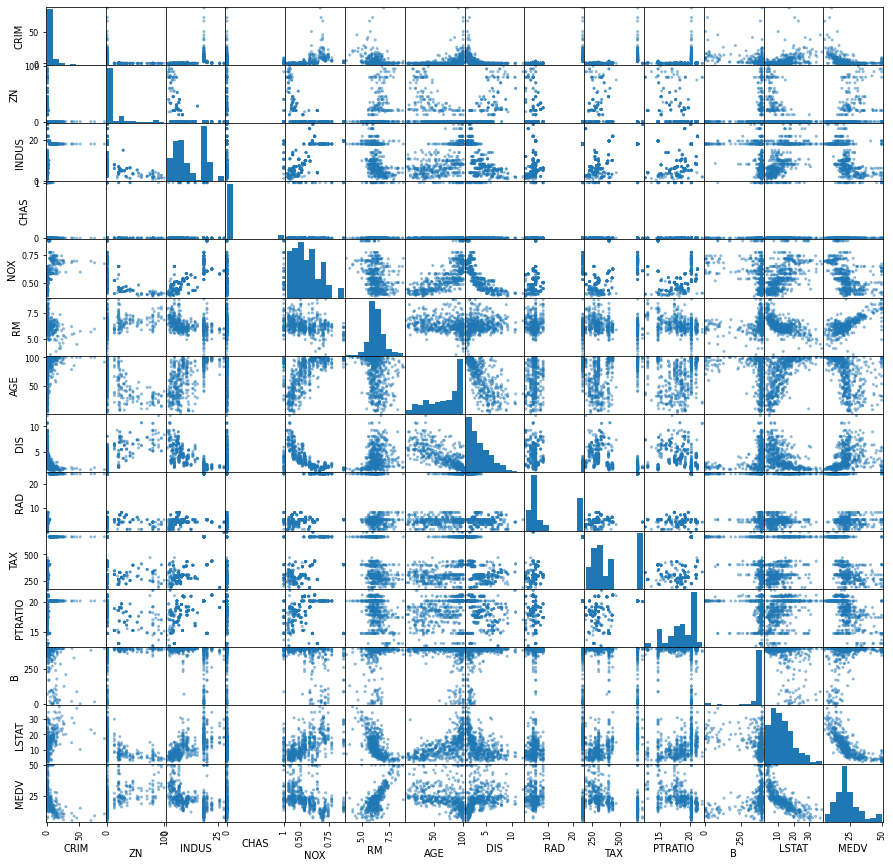

In [42]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(15, 15))
pyplot.show()

The scatter_matrix visualize interactions between variables, some of the higher correlated attributes do show good structure in their relationship. Not linear, but nice predictable curved relationships.

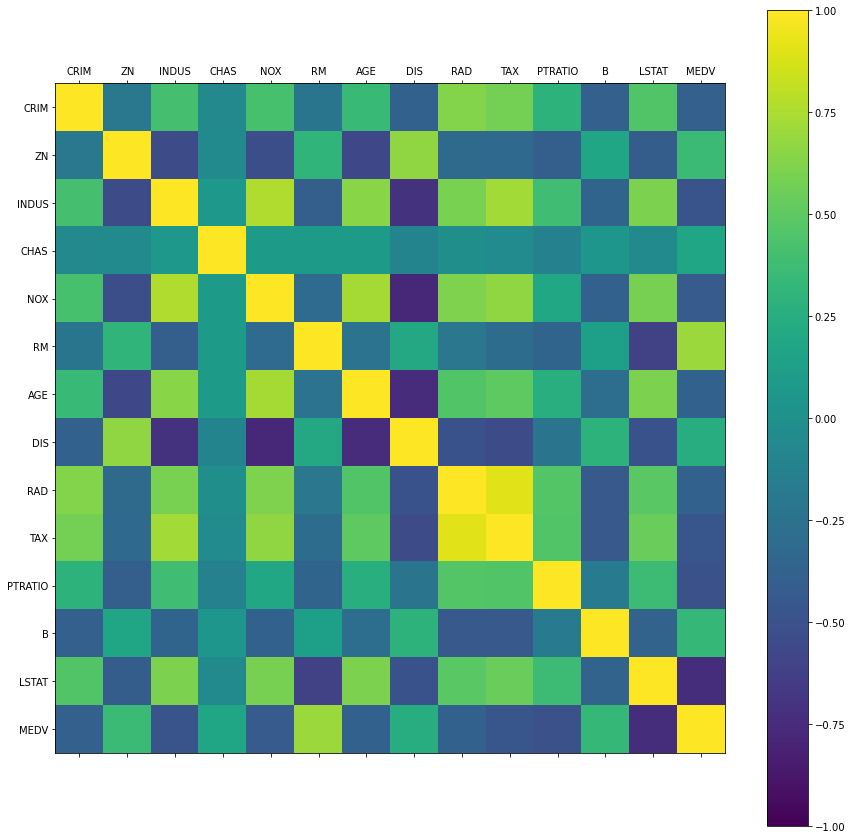

In [55]:
# plot correlation matrix
fig = pyplot.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

The yellow shows positive correlation whereas the violet shows negative correlation, some yellow and violet that suggest attributes for removal to better improve accuracy of models later on.

So far it would be worth trying:
- Feature selection and removing the most correlated attributes.
- Normalizing the dataset to reduce the effect of differing scales.
- Standardizing the dataset to reduce the effects of differing distributions.

### 4. Create validation dataset

In [57]:
# Split-out validation dataset
from sklearn.model_selection import train_test_split

array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [58]:
print(X_train.shape)
print(X_validation.shape)
print(Y_train.shape)
print(Y_validation.shape)

(404, 13)
(102, 13)
(404,)
(102,)


### 5. Evaluate algorithms

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [78]:
# Test options and evaluation metric
# scoring = 'neg_mean_squared_error'

In [126]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [127]:
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(X_train,Y_train)
    predictions = model.predict(X_validation)
    result = mean_squared_error(Y_validation,predictions)
#     result = model.score(X_validation,Y_validation)
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

LR: 34.056481
LASSO: 28.978053
EN: 27.302773
KNN: 37.305855
CART: 28.912647
SVR: 72.199580


In [140]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

results = []
names = []
for name, model in pipelines:
    model.fit(X_train,Y_train)
    predictions = model.predict(X_validation)
    result = mean_squared_error(Y_validation,predictions)
#     result = model.score(X_validation,Y_validation)
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

ScaledLR: 34.056481
ScaledLASSO: 39.571398
ScaledEN: 39.329850
ScaledKNN: 21.113251
ScaledCART: 29.333529
ScaledSVR: 31.540452


That scaling did have an effect on KNN, improving the score greater than other models.

### 6. Improve result with tuning

In [96]:
# KNN tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
# kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=None)
grid_result = grid.fit(rescaledX, Y_train)

In [97]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -18.491860 using {'n_neighbors': 3}


The k (n neighbors) is 3 providing the 'neg_mean_squared_error' =  -18.491860, the best so far.

In [98]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-20.789740 (8.597843) with: {'n_neighbors': 1}
-18.491860 (10.152596) with: {'n_neighbors': 3}
-20.426064 (9.520443) with: {'n_neighbors': 5}
-20.055621 (9.139052) with: {'n_neighbors': 7}
-21.051984 (9.219076) with: {'n_neighbors': 9}
-20.994526 (9.591611) with: {'n_neighbors': 11}
-21.250052 (9.838752) with: {'n_neighbors': 13}
-22.022308 (9.841152) with: {'n_neighbors': 15}
-23.247368 (9.742017) with: {'n_neighbors': 17}
-24.222094 (10.088847) with: {'n_neighbors': 19}
-24.720087 (9.909941) with: {'n_neighbors': 21}


### 7. Use ensemble models

Another way that can improve the performance of algorithms on this problem is using ensemble methods.

Let's evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:

- Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
- Bagging Methods: Random Forests (RF) and Extra Trees (ET).

In [141]:
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    model.fit(X_train,Y_train)
    result = model.score(X_validation,Y_validation)
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

ScaledAB: 0.722279
ScaledGBM: 0.868570
ScaledRF: 0.819517
ScaledET: 0.836286


It looks like Gradient Boosting has a better score.

### 8. Tuning GBM

In [102]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
# kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=None, cv=None)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.883177 using {'n_estimators': 300}
0.869097 (0.049834) with: {'n_estimators': 50}
0.877950 (0.048121) with: {'n_estimators': 100}
0.880029 (0.044037) with: {'n_estimators': 150}
0.882203 (0.041676) with: {'n_estimators': 200}
0.882949 (0.041424) with: {'n_estimators': 250}
0.883177 (0.040619) with: {'n_estimators': 300}
0.882695 (0.040780) with: {'n_estimators': 350}
0.882569 (0.040979) with: {'n_estimators': 400}


The best configuration was n estimators=300 resulting in a score of 0.883177, better than the untuned method.

### 9. Finalize model

In [104]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=300)
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaled_Xval = scaler.transform(X_validation)
predictions = model.predict(rescaled_Xval)
print(mean_squared_error(Y_validation, predictions))

11.723992375583723


The estimated mean squared error is 11.7.

### 10. Prediction with a new record

In [163]:
# Create a new record
X_new = np.array([0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14])
X_new.shape

(13,)

In [164]:
rescaled_Xnew = scaler.transform(X_new.reshape(1,-1))

In [165]:
rescaled_Xnew.shape

(1, 13)

In [166]:
pred = model.predict(rescaled_Xnew)
print(pred)

[27.892]
